In [ ]:
pip install awswrangler

In [1]:
import boto3
import awswrangler as wr
import pandas as pd
import glob
import sagemaker
from sagemaker.image_uris import retrieve
from time import gmtime, strftime

In [2]:
BUCKET_RAW = "ml-dataset-raw-s3"
BUCKET_PREFIX = 'sagemaker'
#execution_role = sagemaker.get_execution_role()
BUCKET_PREFIX2009 = "raw-out/2009.csv"

pathfull2009 = f"s3://{BUCKET_RAW}/{BUCKET_PREFIX2009}"
with open(file='from_s3/2009.csv', mode='wb') as local_f:

    wr.s3.download(path=pathfull2009, local_file=local_f)

BUCKET_PREFIX2010 = "raw-out/2010.csv"

pathfull2010 = f"s3://{BUCKET_RAW}/{BUCKET_PREFIX2010}"
with open(file='from_s3/2010.csv', mode='wb') as local_f:

    wr.s3.download(path=pathfull2010, local_file=local_f)

BUCKET_PREFIX2011 = "raw-out/2011.csv"

pathfull2011 = f"s3://{BUCKET_RAW}/{BUCKET_PREFIX2011}"
with open(file='from_s3/2011.csv', mode='wb') as local_f:

    wr.s3.download(path=pathfull2011, local_file=local_f)

BUCKET_PREFIX2012 = "raw-out/2012.csv"

pathfull2012 = f"s3://{BUCKET_RAW}/{BUCKET_PREFIX2012}"
with open(file='from_s3/2012.csv', mode='wb') as local_f:

    wr.s3.download(path=pathfull2012, local_file=local_f)

BUCKET_PREFIX2013 = "raw-out/2013.csv"

pathfull2013 = f"s3://{BUCKET_RAW}/{BUCKET_PREFIX2013}"
with open(file='from_s3/2013.csv', mode='wb') as local_f:

    wr.s3.download(path=pathfull2013, local_file=local_f)

BUCKET_PREFIX2014 = "raw-out/2014.csv"

pathfull2014 = f"s3://{BUCKET_RAW}/{BUCKET_PREFIX2014}"
with open(file='from_s3/2014.csv', mode='wb') as local_f:

    wr.s3.download(path=pathfull2014, local_file=local_f)

BUCKET_PREFIX2015 = "raw-out/2015.csv"

pathfull2015 = f"s3://{BUCKET_RAW}/{BUCKET_PREFIX2015}"
with open(file='from_s3/2015.csv', mode='wb') as local_f:

    wr.s3.download(path=pathfull2015, local_file=local_f)

BUCKET_PREFIX2016 = "raw-out/2016.csv"

pathfull2016 = f"s3://{BUCKET_RAW}/{BUCKET_PREFIX2016}"
with open(file='from_s3/2016.csv', mode='wb') as local_f:

    wr.s3.download(path=pathfull2016, local_file=local_f)

BUCKET_PREFIX2017 = "raw-out/2017.csv"

pathfull2017 = f"s3://{BUCKET_RAW}/{BUCKET_PREFIX2017}"
with open(file='from_s3/2017.csv', mode='wb') as local_f:

    wr.s3.download(path=pathfull2017, local_file=local_f)

BUCKET_PREFIX2018 = "raw-out/2018.csv"

pathfull2018 = f"s3://{BUCKET_RAW}/{BUCKET_PREFIX2018}"
with open(file='from_s3/2018.csv', mode='wb') as local_f:

    wr.s3.download(path=pathfull2018, local_file=local_f)

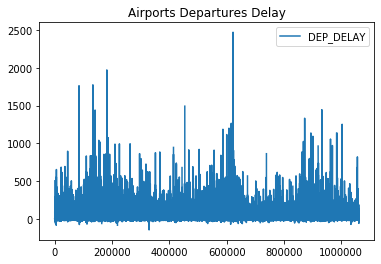

In [4]:
path = r'./from_s3' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

airport_data = pd.concat(li, axis=0, ignore_index=True)

airport_data.plot(title='Airports Departures Delay')

In [5]:
airport_data

,ORIGIN,FL_DATE,DEP_DELAY
0,ABE,2013-01-01,3.500000
1,ABE,2013-01-02,-1.818182
2,ABE,2013-01-03,15.600000
3,ABE,2013-01-04,-8.727273
4,ABE,2013-01-05,-5.666667
...,...,...,...
1062268,YUM,2012-12-27,-3.000000
1062269,YUM,2012-12-28,0.250000
1062270,YUM,2012-12-29,43.000000
1062271,YUM,2012-12-30,-5.875000


In [6]:
from sklearn.model_selection import train_test_split
train, test_and_validate = train_test_split(df, test_size=0.2, random_state=42)

In [7]:
test, validate = train_test_split(test_and_validate, test_size=0.5, random_state=42)

In [8]:
print(train.shape)
print(test.shape)
print(validate.shape)

(84154, 3)
(10519, 3)
(10520, 3)


In [9]:
print(train['DEP_DELAY'].value_counts())
print(test['DEP_DELAY'].value_counts())
print(validate['DEP_DELAY'].value_counts())

-5.000000     1087
-6.000000     1038
-4.000000      967
-7.000000      902
-3.000000      861
              ... 
 13.235294       1
 5.276423        1
 7.534985        1
-1.510204        1
 0.766667        1
Name: DEP_DELAY, Length: 26754, dtype: int64
-4.000000     146
-6.000000     134
-7.000000     129
-5.000000     128
-2.000000     101
             ... 
 0.849057       1
 14.505119      1
 16.955036      1
 4.680000       1
 0.162544       1
Name: DEP_DELAY, Length: 5177, dtype: int64
-5.000000     149
-6.000000     136
-7.000000     110
-3.000000     109
-4.000000     109
             ... 
 62.500000      1
 11.773810      1
 5.279279       1
-6.538462       1
 9.863485       1
Name: DEP_DELAY, Length: 5263, dtype: int64


In [10]:
bucket=f"{BUCKET_RAW}"

prefix=f"{BUCKET_PREFIX}"

train_file='airport_train.csv'
test_file='airport_test.csv'
validate_file='airport_validate.csv'

import os
import io

s3_resource = boto3.Session().resource('s3')
def upload_s3_csv(filename, folder, dataframe):
    csv_buffer = io.StringIO()
    dataframe.to_csv(csv_buffer, header=False, index=False)
    s3_resource.Bucket(bucket).Object(os.path.join(prefix, folder, filename)).put(Body=csv_buffer.getvalue())

In [11]:
upload_s3_csv(train_file, 'train', train)
upload_s3_csv(test_file, 'test', test)
upload_s3_csv(validate_file, 'validate', validate)

In [12]:
import boto3
from sagemaker.image_uris import retrieve
container = retrieve('xgboost',boto3.Session().region_name,'1.0-1')

In [13]:
hyperparams={"num_round":"42",
             "eval_metric": "accuracy",
             "objective": "binary:logistic"}

In [14]:
import sagemaker
s3_output_location="s3://{}/{}/output/".format(bucket,prefix)
xgb_model=sagemaker.estimator.Estimator(container,
                                       sagemaker.get_execution_role(),
                                       instance_count=1,
                                       instance_type='ml.m4.xlarge',
                                       output_path=s3_output_location,
                                        hyperparameters=hyperparams,
                                        sagemaker_session=sagemaker.Session())

In [15]:
train_channel = sagemaker.inputs.TrainingInput(
    "s3://{}/{}/train/".format(bucket,prefix,train_file),
    content_type='text/csv')

validate_channel = sagemaker.inputs.TrainingInput(
    "s3://{}/{}/validate/".format(bucket,prefix,validate_file),
    content_type='text/csv')

data_channels = {'train': train_channel, 'validation': validate_channel}

In [16]:
xgb_model.fit(inputs=data_channels, logs=False)


2022-02-12 23:02:38 Starting - Starting the training job...
2022-02-12 23:02:58 Starting - Launching requested ML instances.................
2022-02-12 23:04:28 Starting - Preparing the instances for training.................
2022-02-12 23:05:56 Downloading - Downloading input data..
2022-02-12 23:06:13 Training - Downloading the training image.......
2022-02-12 23:06:53 Training - Training image download completed. Training in progress...
2022-02-12 23:07:10 Uploading - Uploading generated training model.
2022-02-12 23:07:18 Completed - Training job completed


In [17]:
xgb_predictor = xgb_model.deploy(initial_instance_count=1,
                serializer = sagemaker.serializers.CSVSerializer(),
                instance_type='ml.m4.xlarge')

---------!

In [18]:
test.shape

(10519, 3)

In [19]:
test.head(5)

,ORIGIN,FL_DATE,DEP_DELAY
46685,HLN,2012-10-29,-7.166667
27038,DAB,2012-05-06,6.000000
96651,STL,2012-01-01,4.339130
1728,ABY,2012-11-21,-9.000000
30253,DRO,2012-07-06,-3.222222


In [20]:
row = test.iloc[0:1,1:]
row.head()

,FL_DATE,DEP_DELAY
46685,2012-10-29,-7.166667


In [21]:
import io
batch_X_csv_buffer = io.StringIO()
row.to_csv(batch_X_csv_buffer, header=False, index=False)
test_row = batch_X_csv_buffer.getvalue()
print(test_row)

2012-10-29,-7.166666666666667



In [ ]:
xgb_predictor.predict([test_row])

### Verificar en la consola el endpoint ###

In [ ]:
xgb_predictor.delete_endpoint(delete_endpoint_config=True)

### Performing a batch transform ###

In [ ]:
batch_X = test.iloc[:,1:];
batch_X.head()

In [ ]:
batch_X_file='batch-in.csv'
upload_s3_csv(batch_X_file, 'batch-in', batch_X)

In [ ]:
batch_output = "s3://{}/{}/batch-out/".format(bucket,prefix)
batch_input = "s3://{}/{}/batch-in/{}".format(bucket,prefix,batch_X_file)

xgb_transformer = xgb_model.transformer(instance_count=1,
                                       instance_type='ml.m4.xlarge',
                                       strategy='MultiRecord',
                                       assemble_with='Line',
                                       output_path=batch_output)

xgb_transformer.transform(data=batch_input,
                         data_type='S3Prefix',
                         content_type='text/csv',
                         split_type='Line')
xgb_transformer.wait()

In [ ]:
s3 = boto3.client('s3')
obj = s3.get_object(Bucket=bucket, Key="{}/batch-out/{}".format(prefix,'batch-in.csv.out'))
target_predicted = pd.read_csv(io.BytesIO(obj['Body'].read()),',',names=['class'])
target_predicted.head(5)

In [ ]:
def binary_convert(x):
    threshold = 0.65
    if x > threshold:
        return 1
    else:
        return 0

target_predicted['binary'] = target_predicted['class'].apply(binary_convert)

print(target_predicted.head(10))
test.head(10)